
**Necessary importations**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.metrics import MeanAbsolutePercentageError
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import r2_score, mean_absolute_error

**Downloading DATA**

In [2]:
data=pd.read_csv("/content/data.txt", delimiter='\t')
data.head()

,Month,Day,Hour,PAC,Tm,Eff,Tamb,RH,P,WS,WD,TOA,GHI,BHI,DHI,BNI
0,1,1,10,3802.507576,42.347879,98.894697,14.50,58.81,1017.53,3.15,203.14,6181.305,4278.672,3391.175,887.496,7709.750
1,1,1,11,3059.995455,55.044545,98.122879,15.98,54.94,1017.73,2.11,226.10,7261.285,5195.536,4223.724,971.812,8186.512
2,1,1,12,5104.446970,67.297576,98.311212,17.46,50.24,1017.30,1.52,263.35,7637.228,5525.204,4534.102,991.102,8357.933
3,1,1,13,5095.312121,77.016667,98.223939,18.24,48.56,1016.64,1.66,292.72,7283.514,5236.036,4280.465,955.572,8271.674
4,1,1,14,4968.204545,80.223030,98.381667,18.45,48.91,1016.31,2.01,311.29,6224.230,4346.761,3473.797,872.963,7844.699


**DATA Preprocessing**

In [ ]:
data.columns

Index(['Month', 'Day', 'Hour', 'PAC', 'Tm', 'Eff', 'Tamb', 'RH', 'P', 'WS',
       'WD', 'TOA', 'GHI', 'BHI', 'DHI', 'BNI'],
      dtype='object')

In [ ]:
data.shape

(9394, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9394 entries, 0 to 9393
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   9394 non-null   int64  
 1   Day     9394 non-null   int64  
 2   Hour    9394 non-null   int64  
 3   PAC     9394 non-null   float64
 4   Tm      9394 non-null   float64
 5   Eff     9394 non-null   float64
 6   Tamb    9394 non-null   float64
 7   RH      9394 non-null   float64
 8   P       9394 non-null   float64
 9   WS      9394 non-null   float64
 10  WD      9394 non-null   float64
 11  TOA     9394 non-null   float64
 12  GHI     9394 non-null   float64
 13  BHI     9394 non-null   float64
 14  DHI     9394 non-null   float64
 15  BNI     9394 non-null   float64
dtypes: float64(13), int64(3)
memory usage: 1.1 MB


In [ ]:
data.describe()

,Month,Day,Hour,PAC,Tm,Eff,Tamb,RH,P,WS,WD,TOA,GHI,BHI,DHI,BNI
count,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.00000,9394.000000
mean,6.385246,15.540026,11.844049,2728.996212,56.293230,84.898254,19.577275,67.353288,1004.447211,3.916397,228.037244,6264.484603,3773.160933,2582.836476,1191.19292,4121.850071
std,3.286536,8.749525,3.974937,2115.746883,25.588611,32.470833,4.828761,14.330914,4.877227,2.181048,116.200159,4035.607486,3006.480785,2559.752251,856.35780,3184.695110
min,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,7.160000,20.430000,983.420000,0.030000,0.010000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,4.000000,8.000000,8.000000,442.413345,44.344811,98.240121,15.940000,57.170000,1001.430000,2.260000,141.555000,2622.576000,969.443750,161.062750,581.24750,599.089500
50%,6.000000,15.000000,12.000000,2791.191526,62.983697,98.615781,19.270000,66.320000,1003.970000,3.740000,271.980000,6712.258000,3354.455000,1809.398500,1120.70050,4315.431500
75%,9.000000,23.000000,15.000000,4861.013259,77.606250,99.475998,23.140000,78.160000,1006.970000,5.170000,322.835000,9706.918750,6209.692000,4556.224500,1622.59000,7176.257000
max,12.000000,31.000000,20.000000,6124.527273,87.066667,100.000000,37.800000,102.920000,1022.060000,17.570000,359.970000,12939.077000,10476.982000,9027.593000,4124.90900,9633.553000


In [ ]:
data.isnull().sum()

Month    0
Day      0
Hour     0
PAC      0
Tm       0
Eff      0
Tamb     0
RH       0
P        0
WS       0
WD       0
TOA      0
GHI      0
BHI      0
DHI      0
BNI      0
dtype: int64

In [ ]:
data.isnull().values.any()

False

**DATA Visualisation**

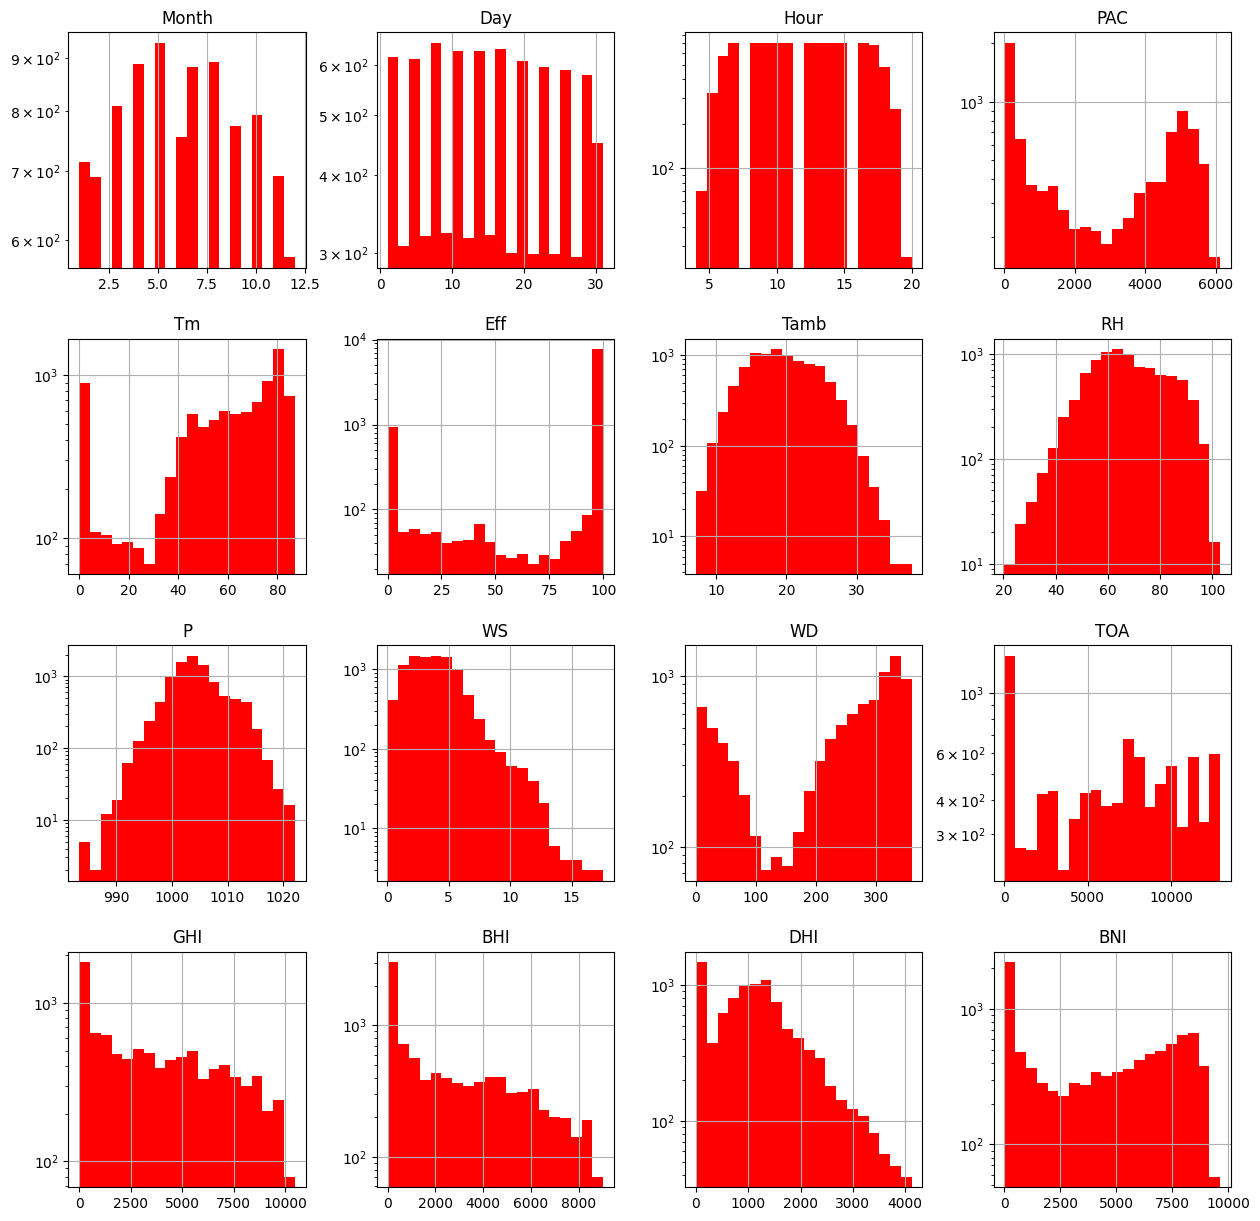

In [ ]:

data.hist(figsize=(15, 15), color="red", histtype='stepfilled', bins=20, log=True)
plt.show()

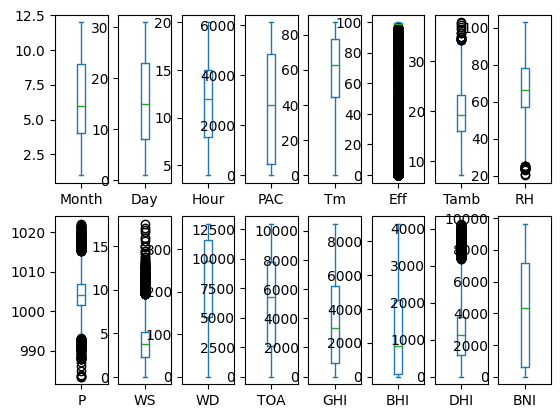

<Figure size 1500x1500 with 0 Axes>

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,8), sharex=False, sharey=False)
plt.figure(figsize=(15,15))
plt.show()

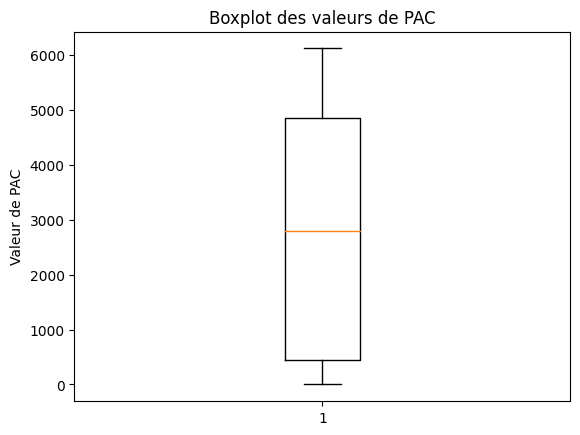

In [ ]:
plt.boxplot(data['PAC'])
plt.ylabel('Valeur de PAC')
plt.title('Boxplot des valeurs de PAC')
plt.show()

In [ ]:
from scipy.stats import skew

asymetrie = skew(data['PAC'])
print("Asymétrie :", asymetrie)

Asymétrie : -0.008390250168540737


ceci montre que la distribution des données PAC est syhmétrique comme le boxplot l'indique donc on pourrais informaer qu'on a pas de biais dans nos données
Puisque la distribution de la variable cible est symétrique cela justifie le choix d'un modèle linéaire qu'on va utiliser pour répondre au cahier des charges de ce projet IA

**Target feature**

In [ ]:
data["PAC"].head()

0    3802.507576
1    3059.995455
2    5104.446970
3    5095.312121
4    4968.204545
Name: PAC, dtype: float64

In [ ]:
data["PAC"].describe()

count    9394.000000
mean     2728.996212
std      2115.746883
min         0.000000
25%       442.413345
50%      2791.191526
75%      4861.013259
max      6124.527273
Name: PAC, dtype: float64

**split DATA**

In [41]:
y=data.PAC
x=data.drop("PAC",axis=1)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
 data.shape[1]

16

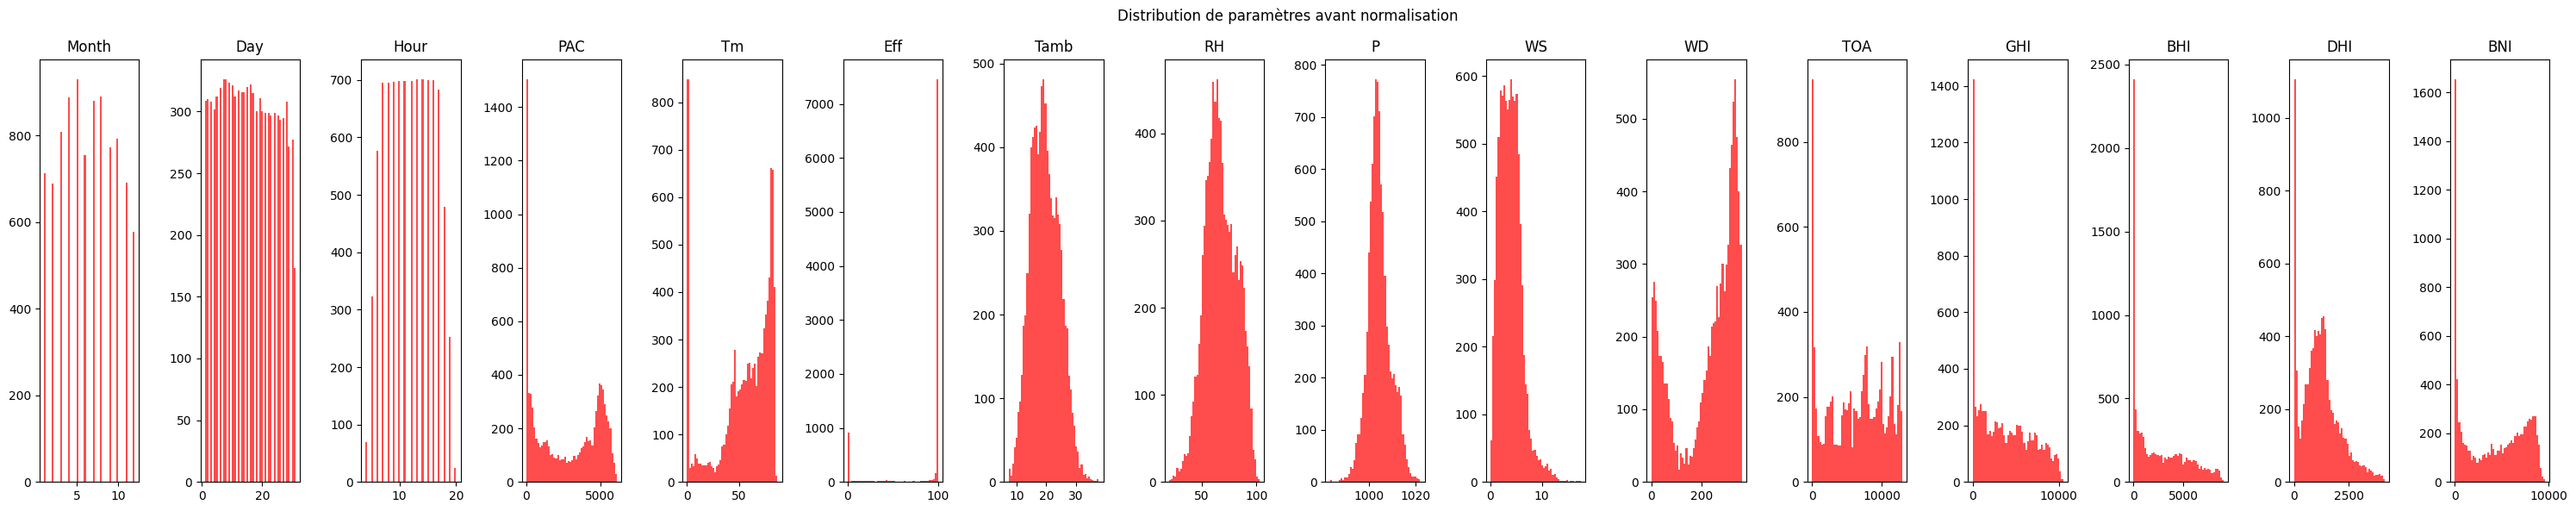

In [ ]:
def plot_distribution(data, title):
    num_features = data.shape[1]
    DataArray = data.to_numpy()
    fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(30, 6))

    for i, column_name in enumerate(data.columns):
        axes[i].hist(DataArray[:, i], bins=50, color='r', alpha=0.7, label='avant normalisation')
        axes[i].set_title(column_name)
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_distribution(data, title='Distribution de paramètres avant normalisation')


d'après la data.describe() on a bien vu que les données semblent avoir des moyennes et des écarts-types variés et grandes. et d'après la visualisation de la distribution ci-dessus on voit que la plupart des parametres suivent une distribution presque normale


pour maintenir tout ça il est benefique de faire appel à la standarisation vu qu'elle est moins sensible aux valeurs aberrantes qu'on déja vu dans le visualisation boxplot.
la standardisation offre des avantages spécifiques qui peuvent être pertinents en fonction des caractéristiques de nos données et des exigences de notre modèle,
en fin on travail avec un modèle de reseau de neurones avec des fonctions d'activations ReLU c'est preferable de standariser la data pour la stabilité de l'entraînement des réseaux de neurones.
et pour éviter la saturation,en fait  Si les données d'entrée ne sont pas centrées autour de zéro, cela peut entraîner une saturation précoce de la fonction ReLU,Cela peut conduire à une convergence plus rapide du modèle.

**Standarisation of DATA**

In [43]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**The model**

In [44]:
modele = Sequential(name='OurEncoder')
modele.add(Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'))
modele.add(Dense(32, activation='relu'))
modele.add(Dense(1, activation='linear'))


Nous avons déjà éliminé les valeurs négatives par la fonction **RELU** puis on a pris le Output **lineaire** pour qu'on fasse la prediction






 les valeurs que notre variable cible **PAC** prenne sont postives très grandes donc c'est preferable d'utiliser le MAE mean absolute error comme loss function

Le coefficient de détermination (R²) n'est pas inclus parmi les métriques standard de TensorFlow. Pour utiliser R² comme métrique il faut le définir

In [45]:
def r2_metric(y_true, y_pred):
    # Utiliser la fonction TensorFlow pour calculer le R²
    r2 = 1 - tf.keras.backend.sum(tf.square(y_true - y_pred)) / tf.keras.backend.sum(tf.square(y_true - tf.keras.backend.mean(y_true)))
    return r2

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2_metric, MeanAbsolutePercentageError()])

**Model training**

In [47]:
# Entraînez le modèle
start_time = time.time()
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(x_test_scaled, y_test))
end_time = time.time()
execution_time = end_time - start_time
print(f"Le temps d'exécution est de {execution_time} secondes.")

Epoch 1/100
118/118 [==============================] - 3s 7ms/step - loss: 483663.7188 - r2_metric: 0.8882 - mean_absolute_percentage_error: 10357113856.0000 - val_loss: 333301.2812 - val_r2_metric: 0.9260 - val_mean_absolute_percentage_error: 10997294080.0000
Epoch 2/100
118/118 [==============================] - 0s 4ms/step - loss: 485361.1250 - r2_metric: 0.8873 - mean_absolute_percentage_error: 10319023104.0000 - val_loss: 325298.8125 - val_r2_metric: 0.9278 - val_mean_absolute_percentage_error: 11079137280.0000
Epoch 3/100
118/118 [==============================] - 1s 4ms/step - loss: 491558.5625 - r2_metric: 0.8859 - mean_absolute_percentage_error: 10352547840.0000 - val_loss: 325035.2812 - val_r2_metric: 0.9279 - val_mean_absolute_percentage_error: 11098202112.0000
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 491836.5938 - r2_metric: 0.8862 - mean_absolute_percentage_error: 10316471296.0000 - val_loss: 324447.1562 - val_r2_metric: 0.9280 - val_mean_

In [48]:
modele.summary()

Model: "OurEncoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1024      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Results**

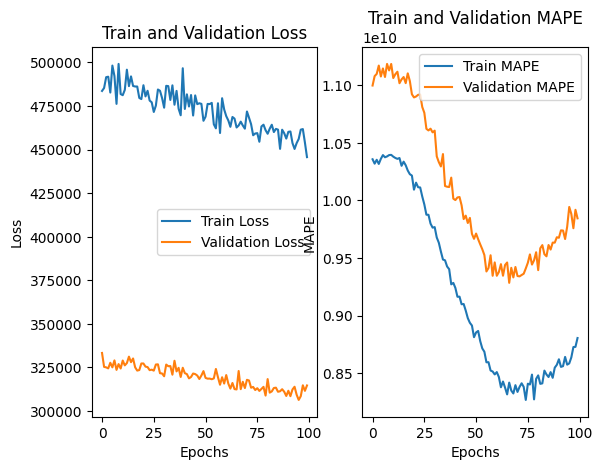

In [49]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_percentage_error'], label='Train MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Train and Validation MAPE')
plt.legend()

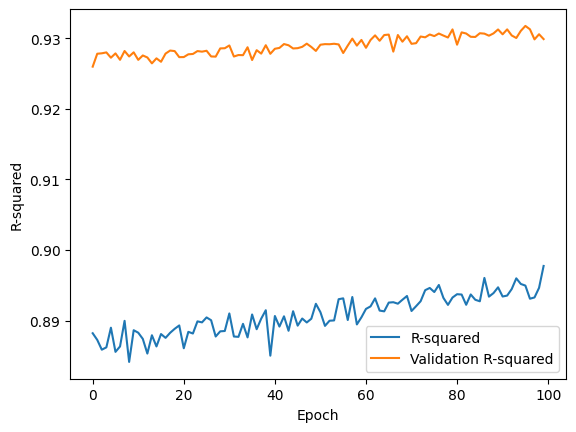

In [50]:
plt.plot(history.history['r2_metric'], label='R-squared')
plt.plot(history.history['val_r2_metric'], label='Validation R-squared')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.legend()
plt.show()

d'après ces dernières vsiualisations on voit bien qu'il y a un écart immense entre les valeures réelles et celles prédites que ce soit avec loss function ou r2-score ce qui montre qu'il y a un overffiting

In [53]:
y_pred = model.predict(x_test_scaled)

59/59 [==============================] - 0s 2ms/step


**precision**

In [54]:
r2 = r2_score(y_test, y_pred)
print("R-square(R²)", r2)

R-square(R²) 0.9320704089725192


<ipython-input-55-bc180f7644b1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-55-bc180f7644b1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax

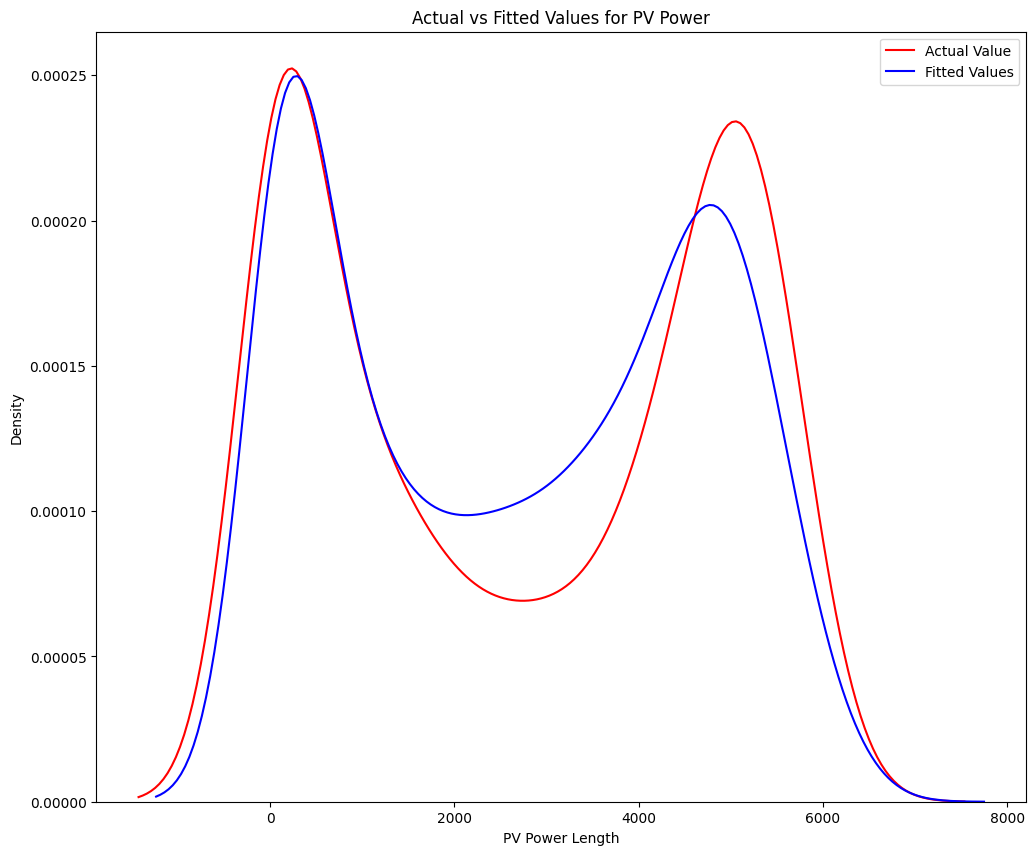

In [55]:
width = 12
height = 10
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for PV Power')
plt.xlabel('PV Power Length')
plt.legend()
plt.show()
plt.close()

le modèle surajuste les données d'entraînement et ne généralise pas bien aux nouvelles données.

**Eliminate the Overfitting**

In [56]:
model = Sequential(name='OurNOfittEncoder')
model.add(Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [57]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2_metric, MeanAbsolutePercentageError()])

In [58]:
start_time = time.time()
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(x_test_scaled, y_test))
end_time = time.time()
execution_time = end_time - start_time
print(f"Le temps d'exécution est de {execution_time} secondes.")

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 11450869.0000 - r2_metric: -1.7006 - mean_absolute_percentage_error: 504313536.0000 - val_loss: 10141555.0000 - val_r2_metric: -1.2705 - val_mean_absolute_percentage_error: 938865472.0000
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 5950775.0000 - r2_metric: -0.4040 - mean_absolute_percentage_error: 887375552.0000 - val_loss: 2378321.5000 - val_r2_metric: 0.4615 - val_mean_absolute_percentage_error: 1964164224.0000
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 1923170.5000 - r2_metric: 0.5439 - mean_absolute_percentage_error: 1444462080.0000 - val_loss: 1415338.1250 - val_r2_metric: 0.6777 - val_mean_absolute_percentage_error: 2883779328.0000
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 1395332.8750 - r2_metric: 0.6718 - mean_absolute_percentage_error: 1836002944.0000 - val_loss: 1011712.8750 - val_r2_metric: 0.7695 - val_me

In [59]:
model.summary()

Model: "OurNOfittEncoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                1024      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Results**

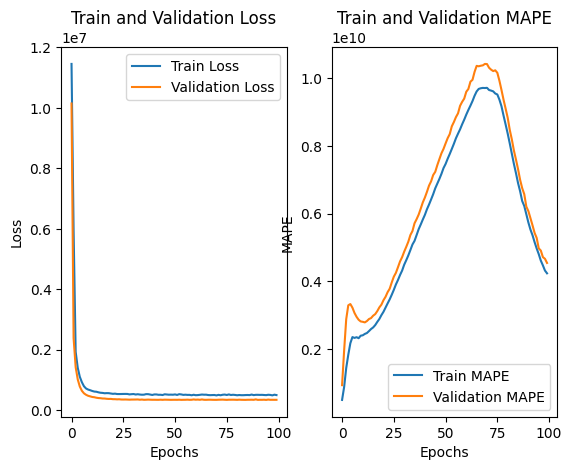

In [60]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_percentage_error'], label='Train MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Train and Validation MAPE')
plt.legend()

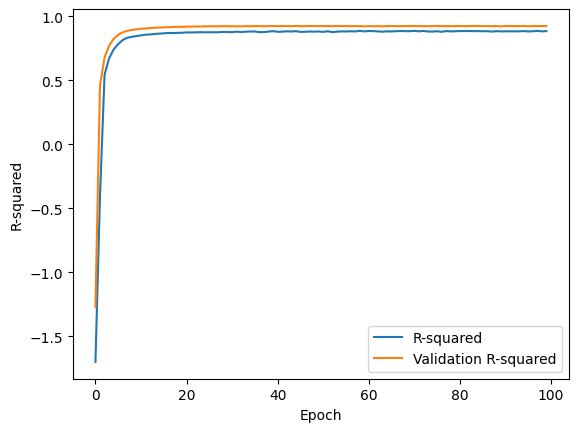

In [61]:
plt.plot(history.history['r2_metric'], label='R-squared')
plt.plot(history.history['val_r2_metric'], label='Validation R-squared')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.legend()
plt.show()

In [62]:
y_pred = model.predict(x_test_scaled)

59/59 [==============================] - 0s 1ms/step


**Precision**

In [63]:
r2 = r2_score(y_test, y_pred)
print("R-square(R²)", r2)

R-square(R²) 0.9276263023914655


<ipython-input-64-bc180f7644b1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-64-bc180f7644b1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax

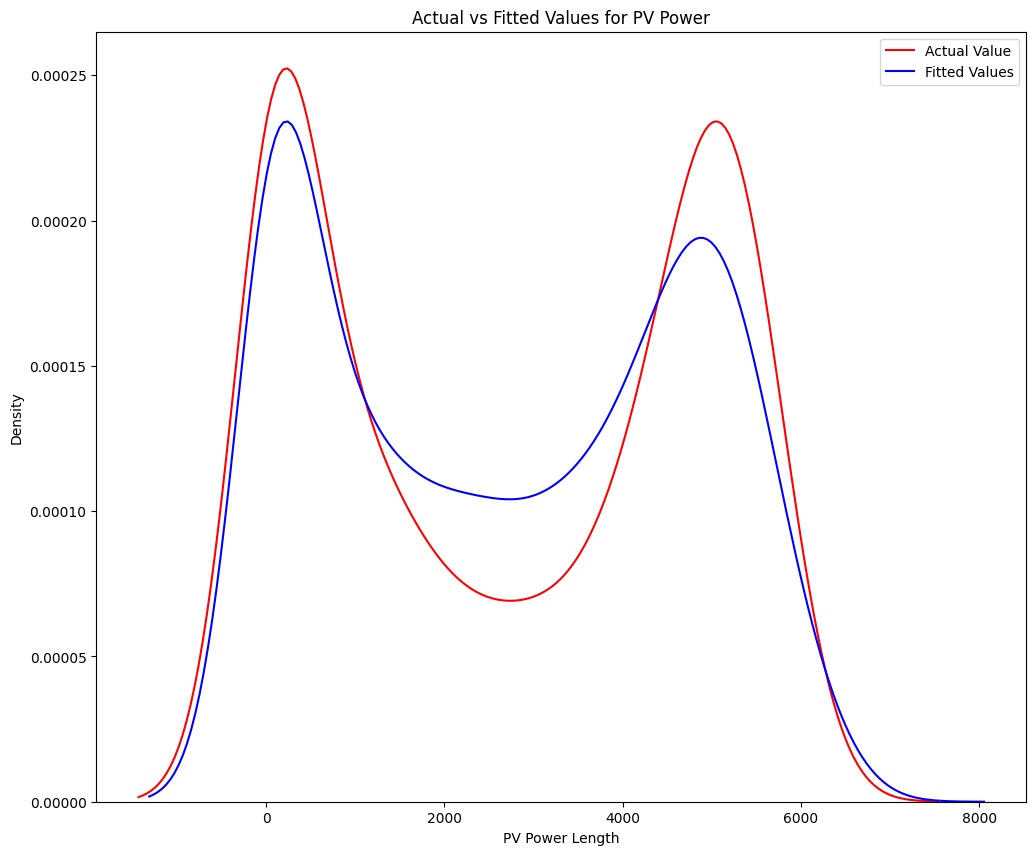

In [64]:
width = 12
height = 10
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for PV Power')
plt.xlabel('PV Power Length')
plt.legend()
plt.show()
plt.close()

93% de la variance de variables que nous essayons de prédire est expèliqué par le modèle

**Test the model for differents hyperparameteres**

In [ ]:
def create_and_train_model(x_train_scaled, y_train, x_test_scaled, y_test, units, hidden_layers, batch_size, epochs):
    model = Sequential(name='OurNOfittEncoder')
    model.add(Dense(units, input_dim=x_train_scaled.shape[1], activation='relu'))

    for _ in range(hidden_layers):
        model.add(Dense(units, activation='relu'))

    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2_metric, MeanAbsolutePercentageError()])

    start_time = time.time()
    history = model.fit(x_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test_scaled, y_test))
    duration = time.time() - start_time

    y_pred = model.predict(x_test_scaled)
    r2 = r2_score(y_test, y_pred)

    return r2, duration


In [ ]:
units_values = [32, 64, 128]
hidden_layers_values = [1, 2, 3]
batch_size_values = [16, 32, 64]
epochs_values = [50, 100, 150]


results = []


for units in units_values:
    for hidden_layers in hidden_layers_values:
        for batch_size in batch_size_values:
            for epochs in epochs_values:
                print(f"Training with units={units}, hidden_layers={hidden_layers}, batch_size={batch_size}, epochs={epochs}")


                x_train, x_test, y_train, y_test = train_test_split(data.drop("PAC", axis=1), data['PAC'], test_size=0.2, random_state=40)
                scaler = StandardScaler()
                x_train_scaled = scaler.fit_transform(x_train)
                x_test_scaled = scaler.transform(x_test)


                r2, duration = create_and_train_model(x_train_scaled, y_train, x_test_scaled, y_test, units, hidden_layers, batch_size, epochs)


                results.append({
                    'Units': units,
                    'Hidden Layers': hidden_layers,
                    'Batch Size': batch_size,
                    'Epochs': epochs,
                    'R-squared': r2,
                    'Training Duration': duration
                })


results = pd.DataFrame(results)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 76/150
470/470 [==============================] - 2s 4ms/step - loss: 191330.6562 - r2_metric: 0.9509 - mean_absolute_percentage_error: 2420491776.0000 - val_loss: 206495.5000 - val_r2_metric: 0.9501 - val_mean_absolute_percentage_error: 3164407552.0000
Epoch 77/150
470/470 [==============================] - 2s 4ms/step - loss: 190479.2031 - r2_metric: 0.9503 - mean_absolute_percentage_error: 2405902848.0000 - val_loss: 207673.1250 - val_r2_metric: 0.9499 - val_mean_absolute_percentage_error: 3230995968.0000
Epoch 78/150
470/470 [==============================] - 2s 4ms/step - loss: 190309.8281 - r2_metric: 0.9518 - mean_absolute_percentage_error: 2369523968.0000 - val_loss: 206236.3750 - val_r2_metric: 0.9502 - val_mean_absolute_percentage_error: 2673842176.0000
Epoch 79/150
470/470 [==============================] - 2s 4ms/step - loss: 189935.0938 - r2_metric: 0.9511 - mean_absolute_percentage_error: 

In [ ]:
print(results)

    Units  Hidden Layers  Batch Size  Epochs  R-squared  Training Duration
0      32              1          16      50   0.937469         142.775245
1      32              1          16     100   0.950023         203.532542
2      32              1          16     150   0.951842         262.716828
3      32              1          32      50   0.935105          41.770752
4      32              1          32     100   0.944672         142.697576
..    ...            ...         ...     ...        ...                ...
76    128              3          32     100   0.957258         143.490847
77    128              3          32     150   0.955479         203.682300
78    128              3          64      50   0.954195          42.427330
79    128              3          64     100   0.952922          73.799956
80    128              3          64     150   0.953637         113.394057

[81 rows x 6 columns]


**best results of** **hyperparametres**

In [ ]:
best_result = results.loc[results.groupby('Units')['R-squared'].idxmax()]


print("\nBest Performing Hyperparameters:")
print(best_result)



Best Performing Hyperparameters:
    Units  Hidden Layers  Batch Size  Epochs  R-squared  Training Duration
20     32              3          16     150   0.955273         383.660054
47     64              3          16     150   0.957673         383.560581
67    128              2          32     100   0.957268         143.366623


In [ ]:
CorrelationMatrix = np.corrcoef(y_test, y_pred[:, 0], rowvar=False)
correlation_matrix = pd.DataFrame(CorrelationMatrix)
print("\ncorrelation_matrix")
print(correlation_matrix)



correlation_matrix
          0         1
0  1.000000  0.965111
1  0.965111  1.000000


cela vaut dire qu'il y a une forte corrélation positive entre les vraies valeurs et les valeurs prédites

**Get the correlated features**

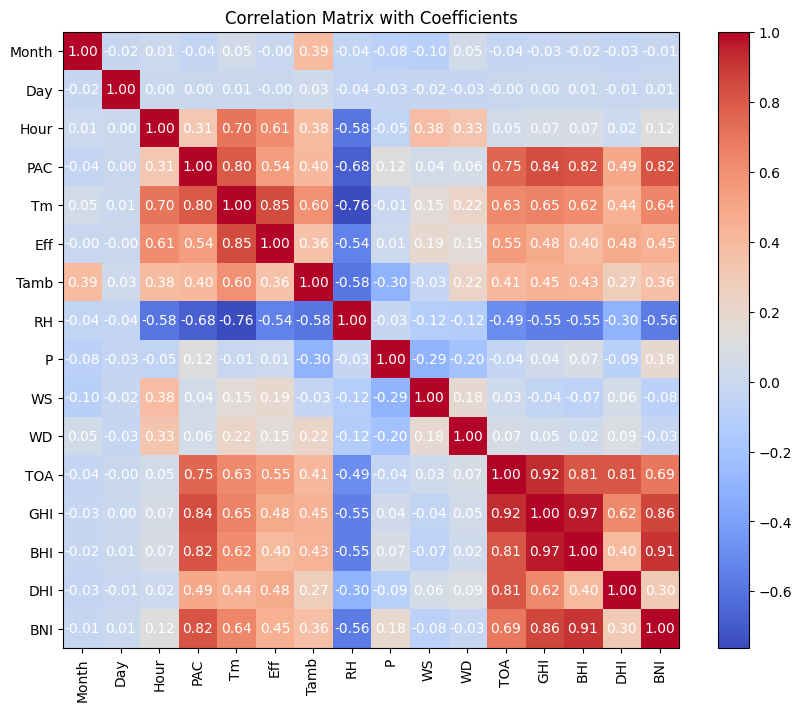

In [71]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')

plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)

for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='w')

plt.title('Correlation Matrix with Coefficients')
plt.colorbar()
plt.show()


In [72]:
correlation_matrix =  data.drop('PAC', axis=1).corr()
seuil = 0.9
correlated_pairs = np.where(np.abs(correlation_matrix) > seuil)
correlated_pairs = list(zip(correlated_pairs[0], correlated_pairs[1]))

variable_pairs = [(correlation_matrix.columns[i], correlation_matrix.columns[j]) for i, j in correlated_pairs if i < j]

print(variable_pairs)

[('TOA', 'GHI'), ('GHI', 'BHI'), ('BHI', 'BNI')]


In [66]:
s=x_train.columns
s

Index(['Month', 'Day', 'Hour', 'Tm', 'Eff', 'Tamb', 'RH', 'P', 'WS', 'WD',
       'TOA', 'GHI', 'BHI', 'DHI', 'BNI'],
      dtype='object')

In [67]:
L=[]
for i in s:
  L.append(i)
L

['Month',
 'Day',
 'Hour',
 'Tm',
 'Eff',
 'Tamb',
 'RH',
 'P',
 'WS',
 'WD',
 'TOA',
 'GHI',
 'BHI',
 'DHI',
 'BNI']

the important features in our  model






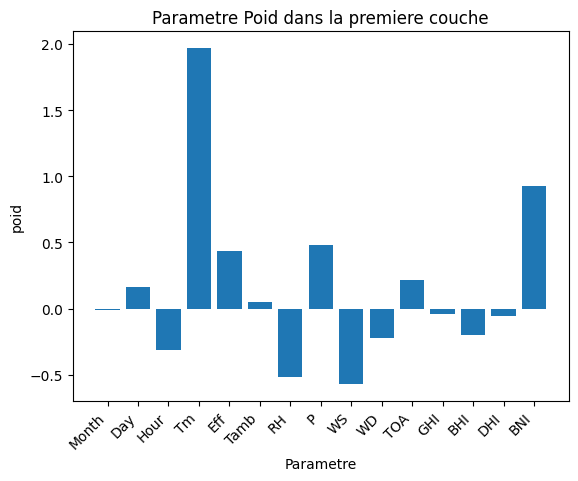

In [69]:

layer_weights = model.layers[0].get_weights()[0]

feature_names = L

if len(feature_names) != layer_weights.shape[0]:
    raise ValueError("Le nombre d'entités dans l'ensemble de données ne correspond pas au nombre de neurones dans la première couche.")

plt.bar(feature_names, layer_weights[:, 0])
plt.xlabel('Parametre')
plt.ylabel('poid')
plt.title('Parametre Poid dans la premiere couche')
plt.xticks(rotation=45, ha='right')
plt.show()


ce qui montre que les parametres qu'ont une grande importance sont ceux de poid élevé comme le montre le diagramme précident
on s'intéresse juste au first layer, du réseau de neurones puisqu'il est souvent plus interprétable que les couches profondes. C'est parce que dans un réseau de neurones, les caractéristiques initiales sont directement liées aux entrées du modèle. En examinant les poids du premier layer, on peut comprendre comment le modèle réagit aux différentes caractéristiques d'entrée

D'après l'importance des paramètres et la corrélation entre eux on peut éliminer GHI et BHI

**Eliminate correlated features from data**



In [75]:
variable_to_drop=['BHI','GHI']

In [78]:
data_no_collinearity = data.drop(variable_to_drop, axis=1)
data_no_collinearity.head()

,Month,Day,Hour,PAC,Tm,Eff,Tamb,RH,P,WS,WD,TOA,DHI,BNI
0,1,1,10,3802.507576,42.347879,98.894697,14.50,58.81,1017.53,3.15,203.14,6181.305,887.496,7709.750
1,1,1,11,3059.995455,55.044545,98.122879,15.98,54.94,1017.73,2.11,226.10,7261.285,971.812,8186.512
2,1,1,12,5104.446970,67.297576,98.311212,17.46,50.24,1017.30,1.52,263.35,7637.228,991.102,8357.933
3,1,1,13,5095.312121,77.016667,98.223939,18.24,48.56,1016.64,1.66,292.72,7283.514,955.572,8271.674
4,1,1,14,4968.204545,80.223030,98.381667,18.45,48.91,1016.31,2.01,311.29,6224.230,872.963,7844.699


In [79]:
y=data_no_collinearity.PAC
x=data_no_collinearity.drop("PAC",axis=1)

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [82]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [83]:
model = Sequential(name='data_no_collinearity')
model.add(Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [84]:
def r2_metric(y_true, y_pred):
    r2 = 1 - tf.keras.backend.sum(tf.square(y_true - y_pred)) / tf.keras.backend.sum(tf.square(y_true - tf.keras.backend.mean(y_true)))
    return r2

In [85]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2_metric, MeanAbsolutePercentageError()])

In [86]:
start_time = time.time()
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32,validation_data=(x_test_scaled, y_test))
end_time = time.time()
execution_time = end_time - start_time
print(f"Le temps d'exécution est de {execution_time} secondes.")

Epoch 1/100
235/235 [==============================] - 2s 3ms/step - loss: 11277397.0000 - r2_metric: -1.6529 - mean_absolute_percentage_error: 685818688.0000 - val_loss: 9522899.0000 - val_r2_metric: -1.1316 - val_mean_absolute_percentage_error: 970042368.0000
Epoch 2/100
235/235 [==============================] - 1s 2ms/step - loss: 5142244.0000 - r2_metric: -0.2049 - mean_absolute_percentage_error: 1148755072.0000 - val_loss: 1983259.1250 - val_r2_metric: 0.5514 - val_mean_absolute_percentage_error: 2260259584.0000
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 1356313.0000 - r2_metric: 0.6756 - mean_absolute_percentage_error: 1932490624.0000 - val_loss: 1029646.6875 - val_r2_metric: 0.7650 - val_mean_absolute_percentage_error: 3431321856.0000
Epoch 4/100
235/235 [==============================] - 1s 2ms/step - loss: 898633.5625 - r2_metric: 0.7872 - mean_absolute_percentage_error: 2434008576.0000 - val_loss: 743110.7500 - val_r2_metric: 0.8301 - val_mean

**Results of our model without correlated features**

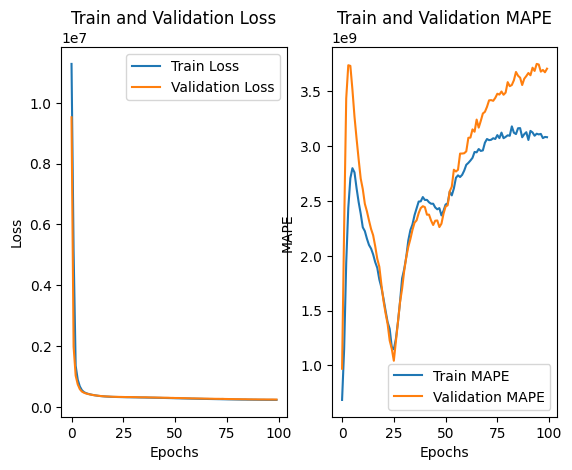

In [87]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_percentage_error'], label='Train MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Train and Validation MAPE')
plt.legend()

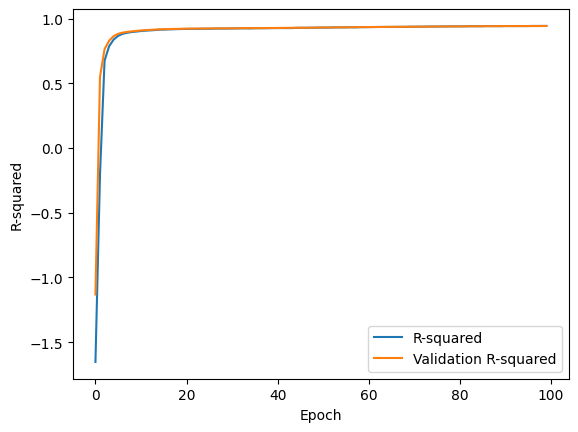

In [88]:
plt.plot(history.history['r2_metric'], label='R-squared')
plt.plot(history.history['val_r2_metric'], label='Validation R-squared')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.legend()
plt.show()

In [89]:
y_pred = model.predict(x_test_scaled)

59/59 [==============================] - 0s 2ms/step


In [90]:
r2 = r2_score(y_test, y_pred)
print("R-square(R²)", r2)

R-square(R²) 0.9473203371717517


In [91]:
model = Sequential(name='best_model')
model.add(Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [92]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2_metric, MeanAbsolutePercentageError()])

In [93]:
start_time = time.time()
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(x_test_scaled, y_test))
end_time = time.time()
execution_time = end_time - start_time
print(f"Le temps d'exécution est de {execution_time} secondes.")

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 11466774.0000 - r2_metric: -1.6923 - mean_absolute_percentage_error: 281241120.0000 - val_loss: 10192861.0000 - val_r2_metric: -1.2815 - val_mean_absolute_percentage_error: 447088000.0000
Epoch 2/100
235/235 [==============================] - 1s 2ms/step - loss: 6040719.0000 - r2_metric: -0.4270 - mean_absolute_percentage_error: 766795264.0000 - val_loss: 2483924.5000 - val_r2_metric: 0.4396 - val_mean_absolute_percentage_error: 1708659840.0000
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 1712322.8750 - r2_metric: 0.5952 - mean_absolute_percentage_error: 1552043648.0000 - val_loss: 1153881.7500 - val_r2_metric: 0.7369 - val_mean_absolute_percentage_error: 2676056576.0000
Epoch 4/100
235/235 [==============================] - 1s 2ms/step - loss: 1160379.7500 - r2_metric: 0.7243 - mean_absolute_percentage_error: 1842782336.0000 - val_loss: 843845.4375 - val_r2_metric: 0.8073 - val_mea

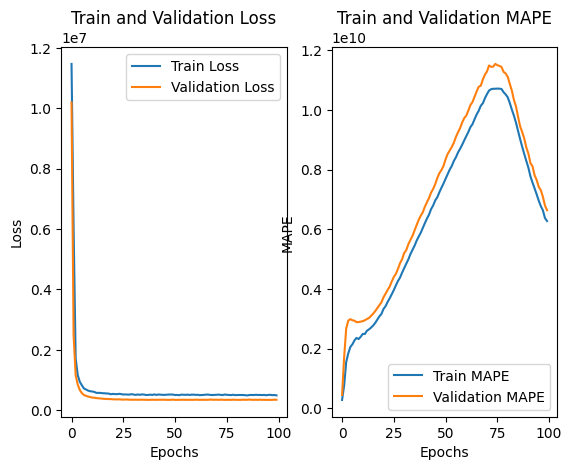

In [94]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_percentage_error'], label='Train MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Train and Validation MAPE')
plt.legend()

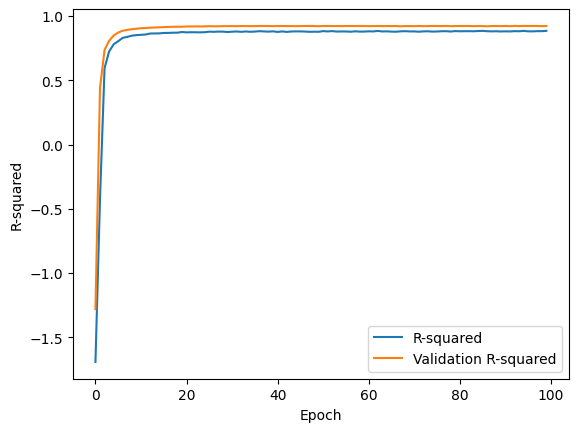

In [95]:
plt.plot(history.history['r2_metric'], label='R-squared')
plt.plot(history.history['val_r2_metric'], label='Validation R-squared')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.legend()
plt.show()

In [96]:
y_pred = model.predict(x_test_scaled)

59/59 [==============================] - 0s 1ms/step


In [97]:
r2 = r2_score(y_test, y_pred)
print("R-square(R²)", r2)

R-square(R²) 0.9264940131341057


<ipython-input-98-bc180f7644b1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-98-bc180f7644b1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax

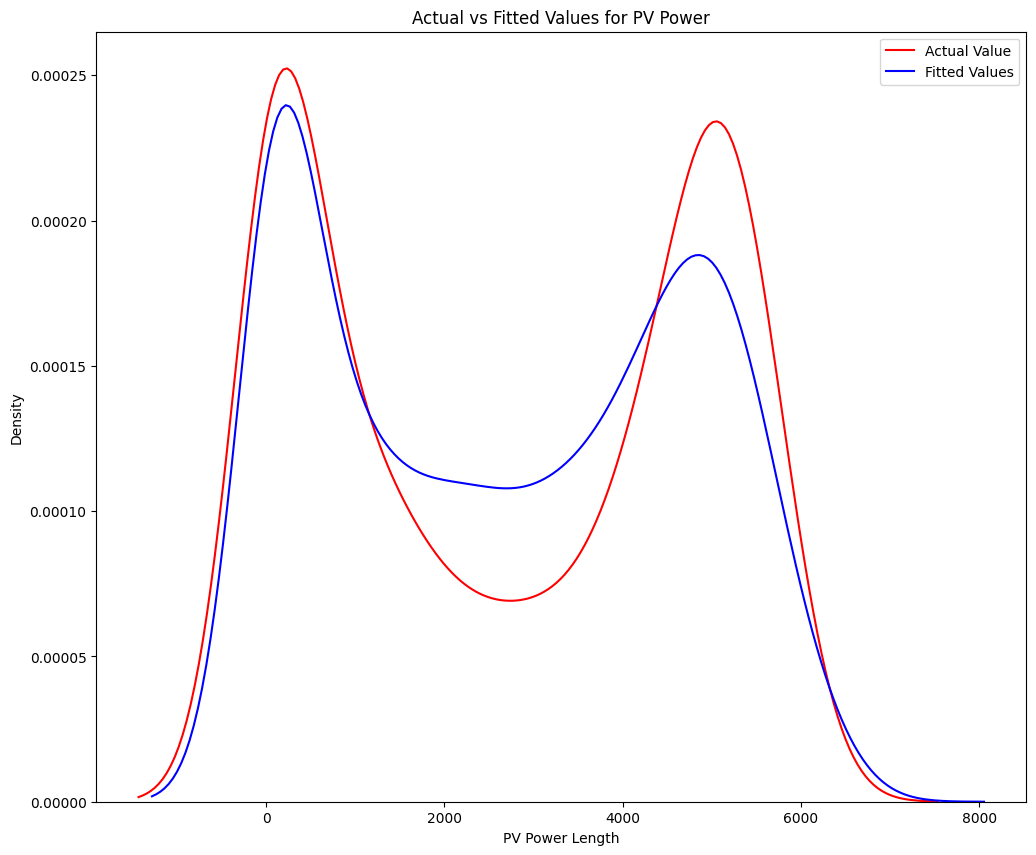

In [98]:
width = 12
height = 10
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for PV Power')
plt.xlabel('PV Power Length')
plt.legend()
plt.show()
plt.close()

**Stacking for increasing the performance of our model with a Random forest model**

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)


model_rf.fit(x_train_scaled, y_train)
y_pred_nn = model.predict(x_test_scaled)

y_pred_rf = model_rf.predict(x_test_scaled)

y_pred_stacking = (y_pred_nn.flatten() + y_pred_rf.flatten()) / 2


r2_stacking = r2_score(y_test, y_pred_stacking)
print(r2_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)


59/59 [==============================] - 0s 1ms/step
0.9656990087284545


**we get finally a precision of 97%**